In [1]:
# Uncomment once and run the file to get access to all the necessary libraries
# %pip install -r requirements.txt
# !apt-get install -y poppler-utils
# !apt-get install -y tesseract-ocr
# !apt-get install -y libmagic1

In [ ]:
import os
import bs4
import ast
import fitz
import uuid
import json
import base64
import markdown
from PIL import Image
from pprint import pprint
from PyPDF2 import PdfMerger
from base64 import b64decode
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
from IPython.display import Image, display
from unstructured.partition.pdf import partition_pdf
from unstructured.documents.elements import Text, Image
from typing_extensions import Annotated, TypedDict, Sequence

from langchain import hub
from langchain_core.prompts import MessagesPlaceholder
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import SystemMessage, HumanMessage
from langchain.text_splitter  import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate

from langchain_community.document_loaders import(
  PyPDFLoader,
  Docx2txtLoader,
  UnstructuredPDFLoader,
  WebBaseLoader,
  UnstructuredMarkdownLoader,
  UnstructuredWordDocumentLoader,
  TextLoader,
  UnstructuredPDFLoader
)

from langchain.schema import BaseMessage
from langchain_community.vectorstores import Chroma, InMemoryVectorStore
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import create_retrieval_chain
from langchain_community.utilities import SQLDatabase
from langchain.chains import create_history_aware_retriever
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_community.tools.sql_database.tool import QuerySQLDataBaseTool

from IPython.display import Image, display
from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

import gradio as gr

True

In [ ]:
# Load API keys

### Connect to the SQL lite database

In [ ]:
# Let's connect to the database again


sqlite
['mri_data']


"[('notumor',), ('glioma',), ('meningioma',), ('pituitary',)]"

## Get your models

In [ ]:
# Tracing via Langsmith
trace = os.getenv("LANGCHAIN_TRACING_V2")
langsmith = os.getenv("LANGCHAIN_API_KEY")

# Build a GPT model


# Embedding model


# Small test

<ipython-input-4-64a1e189a6a7>:11: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings(


Life often feels fleeting because of its transient nature and the constant passage of time. From a philosophical perspective, this can be attributed to the impermanence inherent in existence. Every moment is unique and once it passes, it cannot be reclaimed. This impermanence is a fundamental aspect of the human experience, influencing how we perceive time and our place in the world.

Biologically, life is finite due to the limitations of our bodies and the natural lifecycle of living organisms. We are born, we grow, and eventually, we age and die. This natural progression emphasizes the fleeting nature of life.

Psychologically, as we age, our perception of time seems to accelerate. This is often because each year becomes a smaller fraction of our lived experience, making time feel as though it is passing more quickly.

Culturally, many societies emphasize productivity and achievement, which can lead to a feeling that life is rushing by as we constantly strive to meet various goals an

## Langgraph
### In simple terms works very similar to how OOP operates, it's like a blueprint that enable us to build LLM workflow easily
    Key things why we use langgraph here instead of an agent is the fact we want it to go through certain actions instead of the llm deciding on it's own and PERSISTENCE.

In [ ]:
# LangGraph create our workflow!


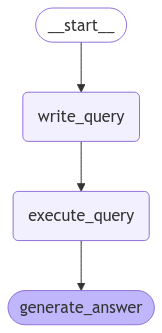

In [ ]:
# We can visualise our image here as well

'There are 1,731 patients labeled as "no tumor" in the dataset.'

In [ ]:
# Function to process the question and get the answer


In [ ]:
# Call the function

What is your SQL related question? 
Do you want to execute query? (yes/no): 
Operation cancelled by user. Here is the query: SELECT image_path, label FROM mri_data WHERE label = 'tumor' LIMIT 5;


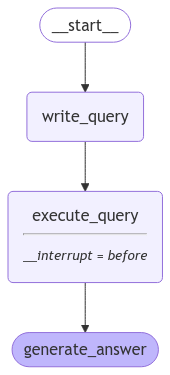

In [ ]:
# New workflow 

# RAG system
## Building the vector store and performing the preprocessing steps

In [12]:
# Merge the PDF together
pdf_files = ["cancer1.pdf", "cancer2.pdf"]
merger = PdfMerger()

for pdf in pdf_files:
    merger.append(pdf)

output_path = "merged.pdf"
merger.write(output_path)
merger.close()

[(Document(id='9ba9b72b-7e91-4f68-956f-ab3027e4aca0', metadata={'source': 'merged.pdf', 'coordinates': {'points': ((204.16405399316406, 509.9249787531251), (204.16405399316406, 520.4249783156251), (384.19682074179843, 520.4249783156251), (384.19682074179843, 509.9249787531251)), 'system': 'PixelSpace', 'layout_width': 594.95996, 'layout_height': 841.91998}, 'filename': 'merged.pdf', 'languages': ['eng'], 'last_modified': '2024-12-05T08:34:21', 'page_number': 2, 'parent_id': '8682f3e11991af7f7a659de31825b5a7', 'filetype': 'application/pdf', 'category': 'Title', 'element_id': 'd886d4d4e842dd91917d38732653de1b'}, page_content='Anatomy of the inside of the brain.'),
  0.5597748259073476),
 (Document(id='b1432fdd-a320-4e52-b76c-cd29aed928c5', metadata={'source': 'merged.pdf', 'coordinates': {'points': ((132.374994484375, 608.9249746281255), (132.374994484375, 619.4249741906256), (349.9557334185104, 619.4249741906256), (349.9557334185104, 608.9249746281255)), 'system': 'PixelSpace', 'layout_

(Document(id='228f33d8-ae1e-4b36-8cd1-f0e735b43d0d', metadata={'source': 'merged.pdf', 'coordinates': {'points': ((204.16405399316406, 509.9249787531251), (204.16405399316406, 520.4249783156251), (384.19682074179843, 520.4249783156251), (384.19682074179843, 509.9249787531251)), 'system': 'PixelSpace', 'layout_width': 594.95996, 'layout_height': 841.91998}, 'filename': 'merged.pdf', 'languages': ['eng'], 'last_modified': '2024-12-05T15:02:39', 'page_number': 2, 'parent_id': '8682f3e11991af7f7a659de31825b5a7', 'filetype': 'application/pdf', 'category': 'Title', 'element_id': 'd886d4d4e842dd91917d38732653de1b'}, page_content='Anatomy of the inside of the brain.'), 0.5598507664364613)
---------------------
((204.16405399316406, 509.9249787531251), (204.16405399316406, 520.4249783156251), (384.19682074179843, 520.4249783156251), (384.19682074179843, 509.9249787531251))


## Multimodal retrieval

In [ ]:
# Multimodal chunking and retrieval
    # Reference: https://docs.unstructured.io/open-source/core-functionality/chunking

In [ ]:
# We get 2 types of elements from the partition_pdf function


In [ ]:
# What is composite elements:


# All the elements related to the title


In [ ]:
# This is what an extracted image looks like.
# It contains the base64 representation only because we set the param extract_image_block_to_payload=True


In [ ]:
# This is what an extracted image looks like.
# It contains the base64 representation only because we set the param extract_image_block_to_payload=True
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]

# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

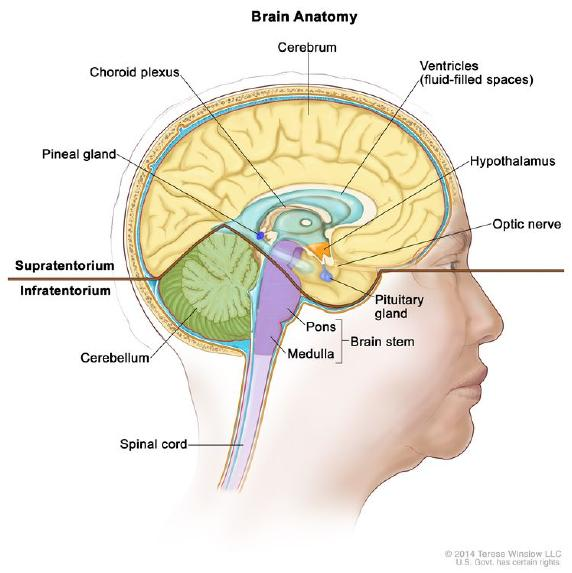

In [ ]:
# Display the image


## Text Summariser

In [ ]:
# Text summariser
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""


In [ ]:
tables[0].to_dict()

In [ ]:
pprint(table_summaries)

['The table is empty and contains no data to summarize.',
 'The table lists four types of astrocytoma: Subependymal giant cell '
 'astrocytoma, Pilocytic astrocytoma, Pilomyxoid astrocytoma, and Diffuse '
 'astrocytoma.',
 'The table lists types of brain tumors: Pleomorphic xanthoastrocytoma, '
 'Anaplastic astrocytoma, Glioblastoma, Giant cell glioblastoma, and '
 'Gliosarcoma.',
 'The table lists two types of brain tumors: Oligodendroglioma and Anaplastic '
 'oligodendroglioma.',
 'The table lists two types of tumors: Oligoastrocytoma and Anaplastic '
 'Oligoastrocytoma.',
 'The table lists three types of ependymal tumors: Subependymoma, '
 'Myxopapillary ependymoma, and Ependymoma.',
 'Anaplastic ependymoma is a type of brain tumor.',
 'Choroid plexus tumors include choroid plexus papilloma, atypical choroid '
 'plexus papilloma, and choroid plexus carcinoma.',
 'Angiocentric glioma and Chordoid glioma of the third ventricle are two '
 'distinct types of gliomas.',
 'The table lists

In [ ]:
pprint(text_summaries)

['Adult central nervous system (CNS) tumors, primarily brain tumors, '
 'constitute 85% to 90% of all primary CNS tumors. In 2024, the U.S. is '
 'estimated to have 25,400 new cases and 18,760 deaths from brain and other '
 'nervous system tumors. SEER data from 2016 to 2020 shows a U.S. incidence of '
 '6.2 per 100,000 people per year and a mortality rate of 4.4 per 100,000 per '
 'year. Globally, in 2020, there were about 308,102 new cases and 251,329 '
 'deaths. The incidence is higher in White individuals, and mortality is '
 'higher in men. The most frequent primary brain tumors are anaplastic '
 'astrocytomas and glioblastomas (38%), while primary spinal tumors are mostly '
 'schwannomas, meningiomas, and ependymomas (79%). Primary brain tumors rarely '
 'metastasize outside the CNS but can spread within it.',
 'The anatomy of the brain is divided into the supratentorium, which includes '
 'the cerebrum, ventricles, choroid plexus, hypothalamus, pineal gland, '
 'pituitary gland,

In [ ]:
# Image summariser
prompt_template = """
  Describe the image in detail. For context,
  the image is part of a research paper explaining the treatment
  of brain cancer. Be specific about graphs, such as bar plots if any.
"""


['The image is a detailed anatomical illustration of the human brain in a '
 'sagittal section. It is labeled with various parts of the brain, relevant '
 'for understanding brain cancer treatment. Key features include:\n'
 '\n'
 '- **Cerebrum**: The largest part of the brain, shown in yellow.\n'
 '- **Choroid Plexus**: Located near the ventricles, responsible for producing '
 'cerebrospinal fluid.\n'
 '- **Pineal Gland**: A small endocrine gland located near the center of the '
 'brain.\n'
 '- **Ventricles**: Fluid-filled spaces within the brain, shown in blue.\n'
 '- **Hypothalamus**: Positioned below the thalamus, involved in hormone '
 'release.\n'
 '- **Optic Nerve**: Indicated at the front, transmitting visual information.\n'
 '- **Pituitary Gland**: Shown below the hypothalamus, a critical endocrine '
 'gland.\n'
 '- **Brain Stem**: Includes the pons, medulla, and spinal cord, which are '
 'essential for basic life functions.\n'
 '- **Cerebellum**: Located at the back, involved 

In [ ]:
# The vectorstore to use to index the child chunks


# The storage layer for the parent documents


# The retriever (empty to start)


In [ ]:
# Add texts


In [ ]:
# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

In [ ]:
# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

In [ ]:
# Retrieve
docs = retriever.invoke("How to treat meningioma?")

In [ ]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

—Grade I meningiomas Active surveillance with deferred treatment Surgery Stereotactic radiosurgery Surgery plus radiation therapy Fractionated radiation therapy —Grades II and III meningiomas and Surgery plus radiation therapy hemangiopericytomas Germ cell tumors Depends on multiple factors

--------------------------------------------------------------------------------


In [ ]:
def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}

In [ ]:
def build_prompt(kwargs):
    

    return ChatPromptTemplate.from_messages([HumanMessage(content=prompt_content),])

In [ ]:
# Text summariser retriever chain
chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | gpt
    | StrOutputParser()
)

In [ ]:
# Doc retriever chain
chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | gpt
        | StrOutputParser()
    )
)

In [ ]:
# response = chain.invoke("Show me a picture of the brain")
response = chain.invoke("How to treat meningioma")

print(response)

The treatment for meningiomas varies based on the grade of the tumor:

- **Grade I meningiomas**: Options include active surveillance with deferred treatment, surgery, stereotactic radiosurgery, surgery plus radiation therapy, or fractionated radiation therapy.
  
- **Grades II and III meningiomas**: Typically, the treatment involves surgery plus radiation therapy.

The choice of treatment often depends on the specific characteristics of the tumor and the patient's overall health.


In [ ]:
# response = chain_with_sources.invoke("Show me a picture of the brain")
response = chain_with_sources.invoke("How to treat meningioma")

if response['context']['images'] is not None:
  for image in response['context']['images']:
      display_base64_image(image)
      break
else:
  print("Response:", response['response'])

# print("\n\nContext:")
# for text in response['context']['texts']:
#     print(text.text)
#     print("Page number: ", text.metadata.page_number)
#     print("\n" + "-"*50 + "\n")
# for image in response['context']['images']:
#     display_base64_image(image)

Here are pictures of the brain from the provided context.


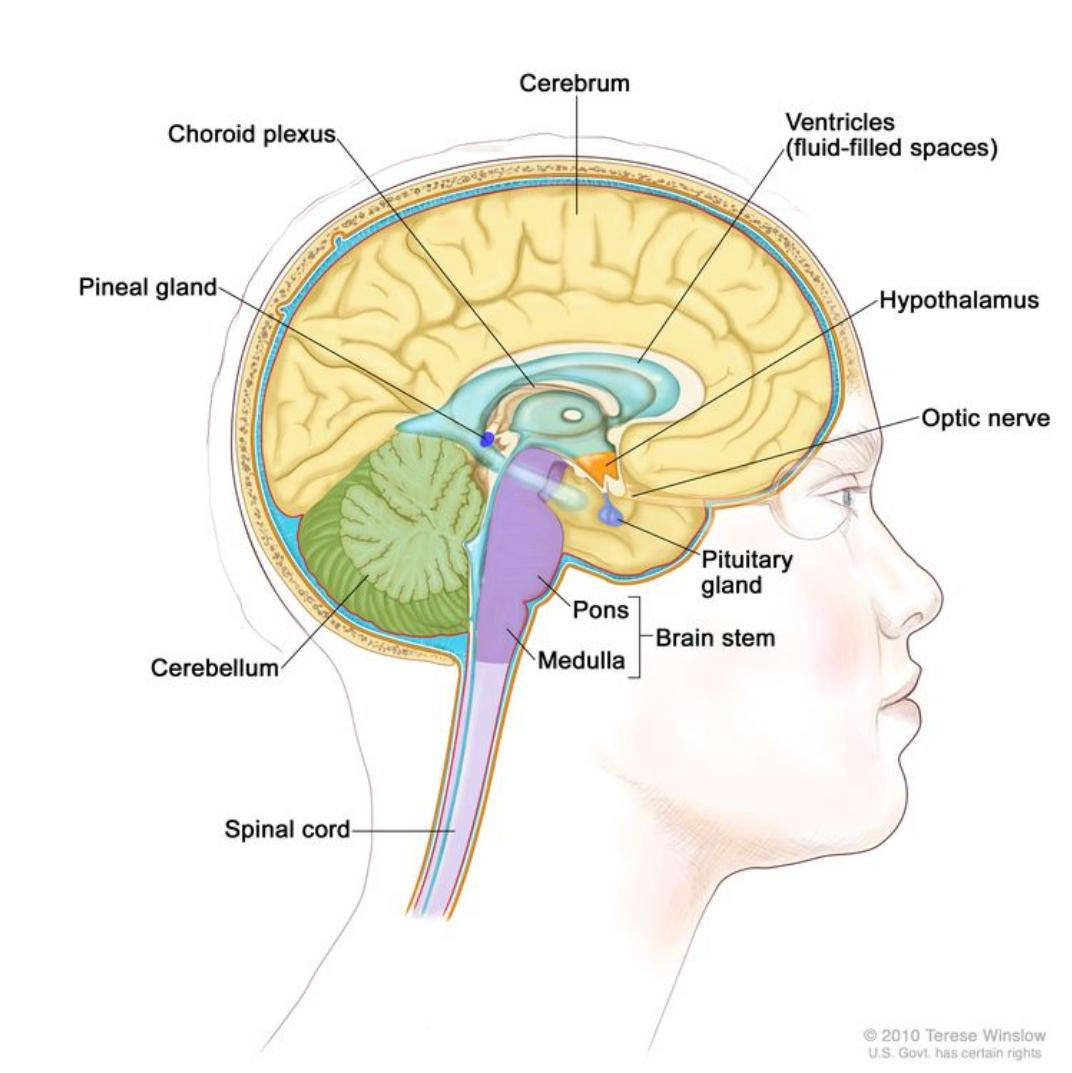

In [ ]:
response = chain.invoke("Show me a picture of the brain")
source = chain_with_sources.invoke("Show me a picture of the brain")
print(response)

# for image in source['context']['images']:
#   display_base64_image(image)

display_base64_image(source['context']['images'][0])